In [9]:
# Import necessary libraries
import sys
import warnings
warnings.filterwarnings('ignore')

# Configure matplotlib for notebook
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['font.size'] = 10
plt.style.use('seaborn-v0_8')

# Import our rotor dynamics analyzer
from rotor_dynamics_analyzer import RotorDynamicsAnalyzer
import pandas as pd
import numpy as np

print("✅ All libraries imported successfully!")
print("📊 Ready for rotor dynamics analysis!")

# Display Python environment info
print(f"\n🐍 Python version: {sys.version}")
print(f"📈 Matplotlib backend: {matplotlib.get_backend()}")


✅ All libraries imported successfully!
📊 Ready for rotor dynamics analysis!

🐍 Python version: 3.13.3 (main, Apr  8 2025, 13:54:08) [Clang 16.0.0 (clang-1600.0.26.6)]
📈 Matplotlib backend: module://matplotlib_inline.backend_inline


In [10]:
# Initialize the rotor dynamics analyzer
analyzer = RotorDynamicsAnalyzer()

# Generate synthetic gas turbine data (1000 rows, 30 columns)
print("🔄 Generating synthetic gas turbine data...")
data = analyzer.generate_synthetic_data(
    n_rows=1000,         # 1000 data points as requested
    n_cols=30,           # 30 parameters as requested  
    save_to_excel=True   # Save to Excel file
)

print(f"✅ Generated data successfully!")
print(f"📊 Data shape: {data.shape}")
print(f"📋 Columns: {list(data.columns)}")

# Display basic statistics
print(f"\n📈 Engine Speed Range: {data['Engine_Speed_RPM'].min():.0f} - {data['Engine_Speed_RPM'].max():.0f} RPM")
print(f"🎯 Bearing 1 Amplitude Range: {data['Bearing_1_Amplitude_mil'].min():.3f} - {data['Bearing_1_Amplitude_mil'].max():.3f} mil")
print(f"🎯 Bearing 2 Amplitude Range: {data['Bearing_2_Amplitude_mil'].min():.3f} - {data['Bearing_2_Amplitude_mil'].max():.3f} mil")


🔄 Generating synthetic gas turbine data...
Generating synthetic gas turbine data (1000 rows, 30 columns)...
Synthetic data saved to synthetic_gas_turbine_data.xlsx
Synthetic data generation completed!
✅ Generated data successfully!
📊 Data shape: (1000, 30)
📋 Columns: ['Time_s', 'Engine_Speed_RPM', 'Bearing_1_Amplitude_mil', 'Bearing_1_Phase_deg', 'Bearing_2_Amplitude_mil', 'Bearing_2_Phase_deg', 'Turbine_Temp_C', 'Compressor_Temp_C', 'Compressor_Pressure_bar', 'Fuel_Flow_kg_h', 'Air_Flow_kg_s', 'Parameter_12', 'Parameter_13', 'Parameter_14', 'Parameter_15', 'Parameter_16', 'Parameter_17', 'Parameter_18', 'Parameter_19', 'Parameter_20', 'Parameter_21', 'Parameter_22', 'Parameter_23', 'Parameter_24', 'Parameter_25', 'Parameter_26', 'Parameter_27', 'Parameter_28', 'Parameter_29', 'Parameter_30']

📈 Engine Speed Range: 0 - 12039 RPM
🎯 Bearing 1 Amplitude Range: 0.289 - 4.146 mil
🎯 Bearing 2 Amplitude Range: 0.474 - 4.450 mil


In [11]:
# Display a preview of the generated data
print("📋 Data Preview:")
print("="*80)
display(data.head(10))

print("\n📊 Data Statistics:")
print("="*80)
display(data[['Engine_Speed_RPM', 'Bearing_1_Amplitude_mil', 'Bearing_2_Amplitude_mil', 
              'Turbine_Temp_C', 'Compressor_Pressure_bar']].describe())


📋 Data Preview:


,Time_s,Engine_Speed_RPM,Bearing_1_Amplitude_mil,Bearing_1_Phase_deg,Bearing_2_Amplitude_mil,Bearing_2_Phase_deg,Turbine_Temp_C,Compressor_Temp_C,Compressor_Pressure_bar,Fuel_Flow_kg_h,...,Parameter_21,Parameter_22,Parameter_23,Parameter_24,Parameter_25,Parameter_26,Parameter_27,Parameter_28,Parameter_29,Parameter_30
0,0.000000,0.000000,0.288764,45.391369,0.764389,118.683411,291.956278,8.347477,0.316232,-54.271409,...,339.691516,999.165075,298.705457,243.197331,778.484797,767.291996,595.570893,263.142553,608.767418,129.496947
1,3.603604,141.145704,0.519824,50.206157,0.672891,119.666687,1417.241919,618.578091,22.465331,2805.781060,...,1055.195594,1729.023957,635.661004,555.838000,829.868678,862.621471,1007.926106,499.652572,1084.063107,222.346426
2,7.207207,170.478829,0.481099,53.203881,0.847948,120.283915,1700.209298,694.895520,26.679139,3431.082635,...,1145.228290,1720.472779,678.242706,649.375706,1044.707875,805.972691,1296.824052,603.458747,1458.972381,230.678927
3,10.810811,98.744713,0.483599,52.681067,0.778273,118.725337,1105.954802,418.770365,16.123552,1980.113937,...,836.810818,1469.465239,578.872652,507.367047,962.277121,899.232420,900.124877,436.979874,1109.259802,170.089256
4,14.414414,213.568538,0.588878,53.443815,0.594271,118.833228,2013.428699,876.064992,32.839164,4313.656098,...,1358.465252,2122.764156,769.782114,787.938576,1358.056804,1038.983605,1606.305294,649.123017,1066.686515,241.617121
5,18.018018,313.132673,0.605951,55.673095,0.782251,119.843842,2796.879094,1242.887121,48.070557,6255.495120,...,1933.333711,2318.685424,999.506075,954.002504,1636.807645,1382.025652,2169.035208,870.725374,1405.898031,257.021148
6,21.621622,339.686794,0.583330,58.058940,0.686566,120.312863,2993.848343,1355.751435,52.370623,6765.170909,...,2061.039873,2066.312326,1030.505393,921.628850,1842.686370,1556.165582,2170.197588,878.602721,1398.757768,259.062975
7,25.225225,396.088610,0.720489,57.946517,0.644264,127.015092,3452.701868,1594.802607,60.302574,7981.308374,...,2208.979099,2487.763586,1117.895183,1137.979129,2010.265007,1508.438145,2400.818055,1049.545145,1304.863170,288.542337
8,28.828829,479.171683,0.440770,58.899805,0.710050,126.326275,4134.547619,1912.072133,72.807011,9599.695152,...,2460.000300,2896.931222,1381.671494,1342.145173,2499.862771,1737.383648,2667.548452,1140.236286,2040.803343,350.055406
9,32.432432,488.121650,0.506045,60.549594,0.851795,124.834971,4225.882487,1976.942069,73.975326,9741.166668,...,2565.660073,2800.719278,1425.512584,1308.732429,2302.588450,1661.402854,2804.314787,1173.863769,1851.831225,370.893131



📊 Data Statistics:


,Engine_Speed_RPM,Bearing_1_Amplitude_mil,Bearing_2_Amplitude_mil,Turbine_Temp_C,Compressor_Pressure_bar
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,6334.291818,1.746737,2.070285,50974.351610,951.125360
std,3054.524296,1.132188,1.130041,24434.559412,458.170661
min,0.000000,0.288764,0.473547,262.720649,-0.085156
25%,3288.986943,0.896728,1.251499,26599.998146,494.298778
50%,6713.356731,1.132790,1.498057,54005.082430,1006.915411
75%,8057.742803,2.889180,3.140097,64753.210306,1209.693337
max,12039.016995,4.146376,4.450170,96600.553690,1806.559987


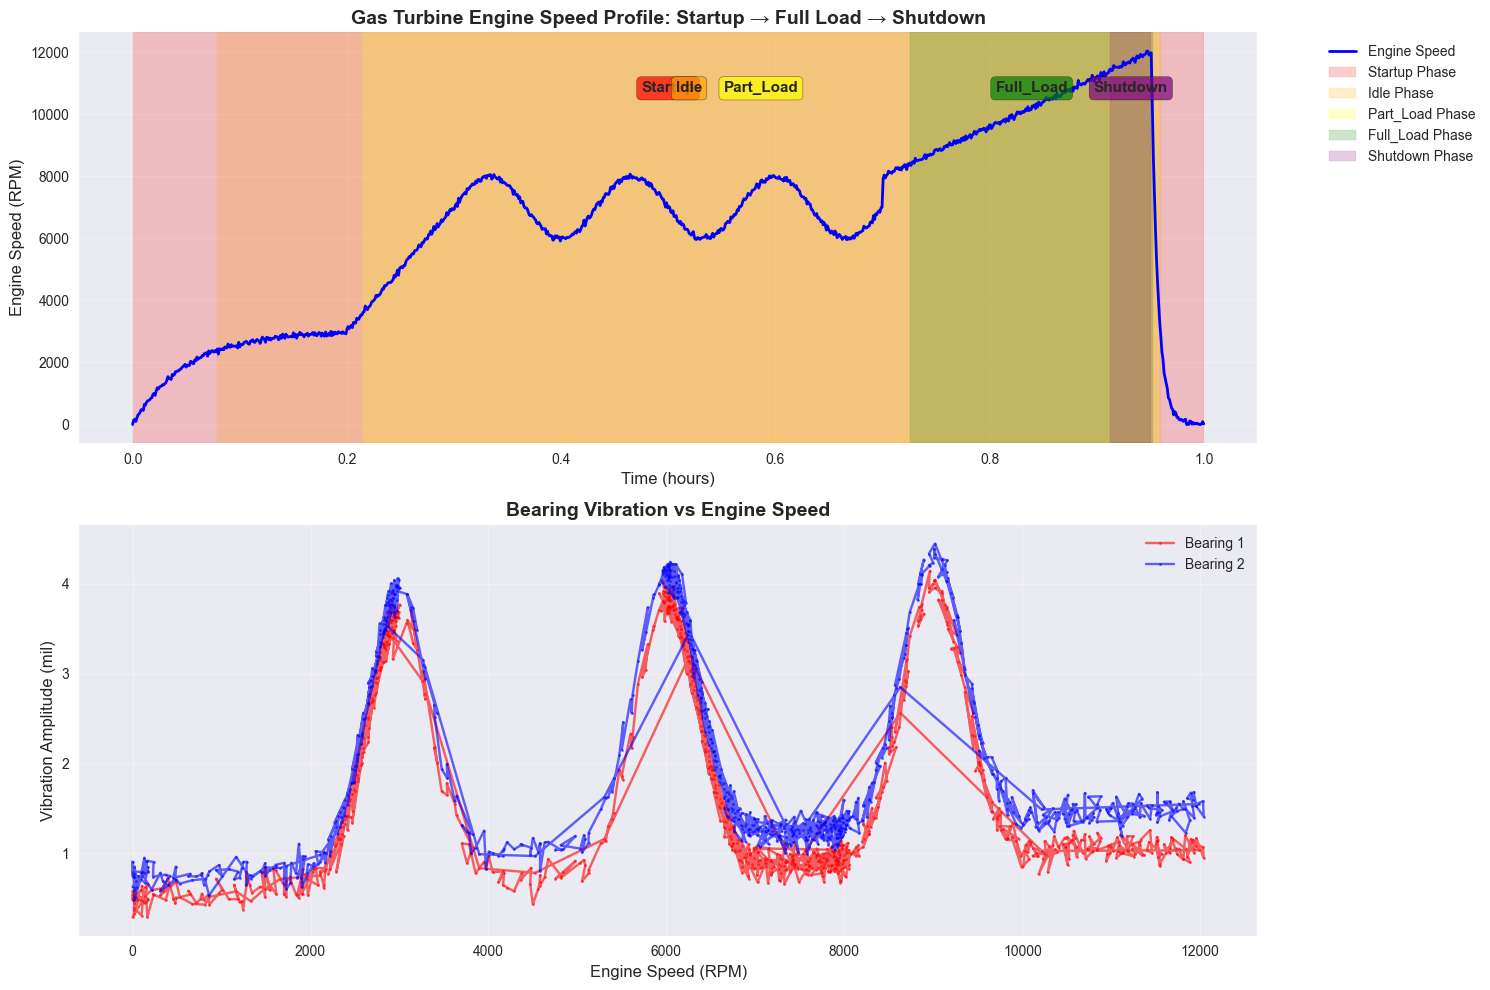

📊 Engine speed trend visualization completed!
🚀 Operation covers 1.0 hours from startup to shutdown


In [12]:
# Create engine speed trend plot with phase labels
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Plot 1: Engine Speed vs Time
time_hours = data['Time_s'] / 3600  # Convert to hours
speed = data['Engine_Speed_RPM']

ax1.plot(time_hours, speed, 'b-', linewidth=2, label='Engine Speed')
ax1.set_xlabel('Time (hours)', fontsize=12)
ax1.set_ylabel('Engine Speed (RPM)', fontsize=12)
ax1.set_title('Gas Turbine Engine Speed Profile: Startup → Full Load → Shutdown', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Add phase annotations
speed_range = speed.max() - speed.min()
phases = analyzer.engine_phases

colors = ['red', 'orange', 'yellow', 'green', 'purple']
for i, (phase_name, (start_pct, end_pct)) in enumerate(phases.items()):
    start_speed = speed.min() + (start_pct / 100) * speed_range
    end_speed = speed.min() + (end_pct / 100) * speed_range
    
    # Find time range for this phase
    mask = (speed >= start_speed) & (speed <= end_speed)
    if mask.any():
        time_start = time_hours[mask].iloc[0]
        time_end = time_hours[mask].iloc[-1]
        
        ax1.axvspan(time_start, time_end, alpha=0.2, color=colors[i], 
                   label=f'{phase_name.title()} Phase')
        
        # Add text label
        mid_time = (time_start + time_end) / 2
        ax1.text(mid_time, speed.max() * 0.9, phase_name.title(),
                ha='center', va='center', fontsize=11, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor=colors[i], alpha=0.7))

ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 2: Bearing vibration during operation
ax2.plot(speed, data['Bearing_1_Amplitude_mil'], 'ro-', markersize=2, alpha=0.6, label='Bearing 1')
ax2.plot(speed, data['Bearing_2_Amplitude_mil'], 'bo-', markersize=2, alpha=0.6, label='Bearing 2')
ax2.set_xlabel('Engine Speed (RPM)', fontsize=12)
ax2.set_ylabel('Vibration Amplitude (mil)', fontsize=12)
ax2.set_title('Bearing Vibration vs Engine Speed', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

print("📊 Engine speed trend visualization completed!")
print(f"🚀 Operation covers {time_hours.max():.1f} hours from startup to shutdown")


🎯 Creating Polar Plot for Bearing 1 Dynamic Trim Balance...
📉 Applying RDP algorithm to reduce data crowding...
Data reduced from 1000 to 564 points (56.4% reduction)
Data reduced from 1000 to 527 points (52.7% reduction)


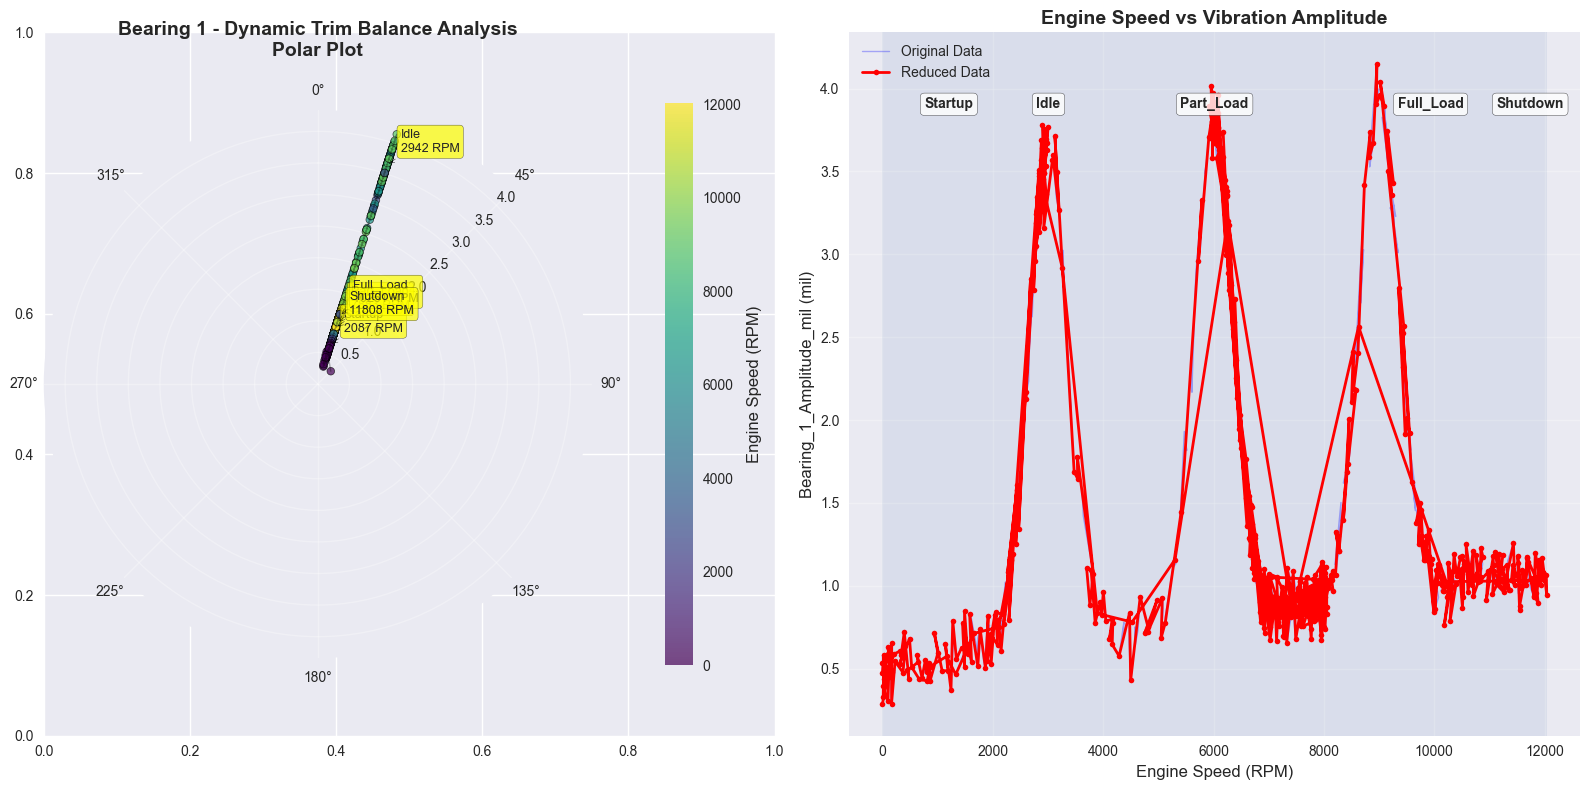


ROTOR DYNAMICS ANALYSIS SUMMARY
Data Points - Original: 1000, Reduced: 564
Speed Range: 0 - 12039 RPM
Amplitude Range: 0.29 - 4.15 mil
Phase Range: 5.6 - 208.8 degrees

Critical Speeds Detected:
  1. 2735 RPM - Amplitude: 2.96 mil
  2. 2744 RPM - Amplitude: 2.89 mil
  3. 2818 RPM - Amplitude: 3.13 mil
  4. 2809 RPM - Amplitude: 3.34 mil
  5. 2786 RPM - Amplitude: 3.08 mil


In [13]:
# Create polar plot for Bearing 1 with RDP data reduction
print("🎯 Creating Polar Plot for Bearing 1 Dynamic Trim Balance...")
print("📉 Applying RDP algorithm to reduce data crowding...")

analyzer.create_polar_plot(
    amplitude_col='Bearing_1_Amplitude_mil',
    phase_col='Bearing_1_Phase_deg',
    speed_col='Engine_Speed_RPM',
    title="Bearing 1 - Dynamic Trim Balance Analysis",
    reduce_data=True,    # Apply RDP data reduction
    epsilon=0.005        # RDP threshold for data reduction
)

plt.show()


🎯 Creating Polar Plot for Bearing 2 Dynamic Trim Balance...
📉 Applying RDP algorithm with different threshold...
Data reduced from 1000 to 325 points (32.5% reduction)
Data reduced from 1000 to 280 points (28.0% reduction)


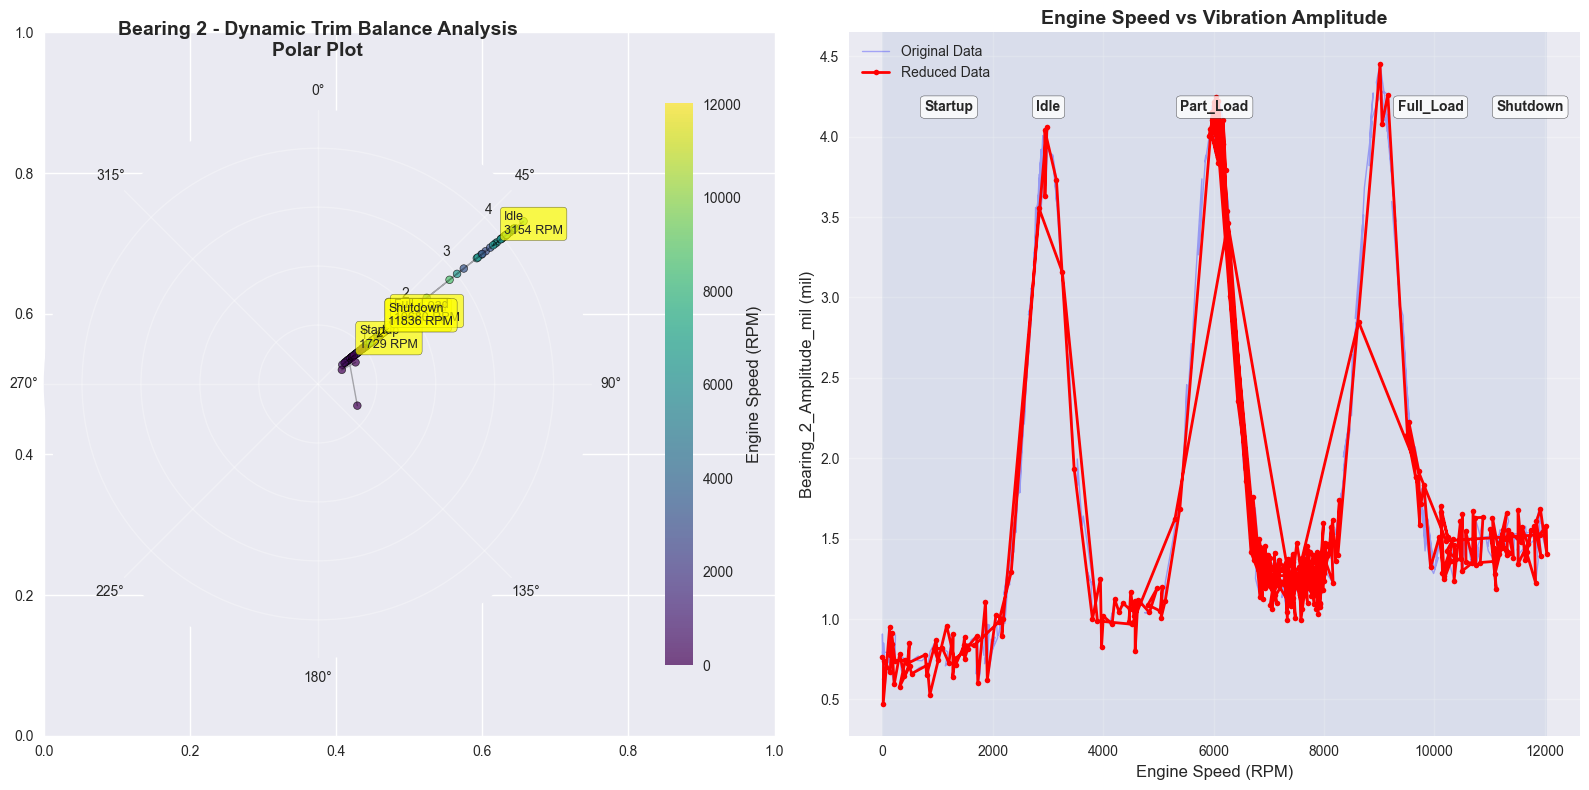


ROTOR DYNAMICS ANALYSIS SUMMARY
Data Points - Original: 1000, Reduced: 325
Speed Range: 0 - 12039 RPM
Amplitude Range: 0.47 - 4.45 mil
Phase Range: 51.5 - 273.6 degrees

Critical Speeds Detected:
  1. 2776 RPM - Amplitude: 3.56 mil
  2. 2811 RPM - Amplitude: 3.44 mil
  3. 2786 RPM - Amplitude: 3.34 mil
  4. 2825 RPM - Amplitude: 3.63 mil
  5. 2877 RPM - Amplitude: 3.92 mil


In [14]:
# Create polar plot for Bearing 2 
print("🎯 Creating Polar Plot for Bearing 2 Dynamic Trim Balance...")
print("📉 Applying RDP algorithm with different threshold...")

analyzer.create_polar_plot(
    amplitude_col='Bearing_2_Amplitude_mil',
    phase_col='Bearing_2_Phase_deg',
    speed_col='Engine_Speed_RPM',
    title="Bearing 2 - Dynamic Trim Balance Analysis",
    reduce_data=True,    # Apply RDP data reduction
    epsilon=0.008        # Slightly different RDP threshold
)

plt.show()


🔍 Demonstrating RDP Algorithm Data Reduction...
Data reduced from 1000 to 901 points (90.1% reduction)
Data reduced from 1000 to 564 points (56.4% reduction)
Data reduced from 1000 to 238 points (23.8% reduction)
Data reduced from 1000 to 141 points (14.1% reduction)


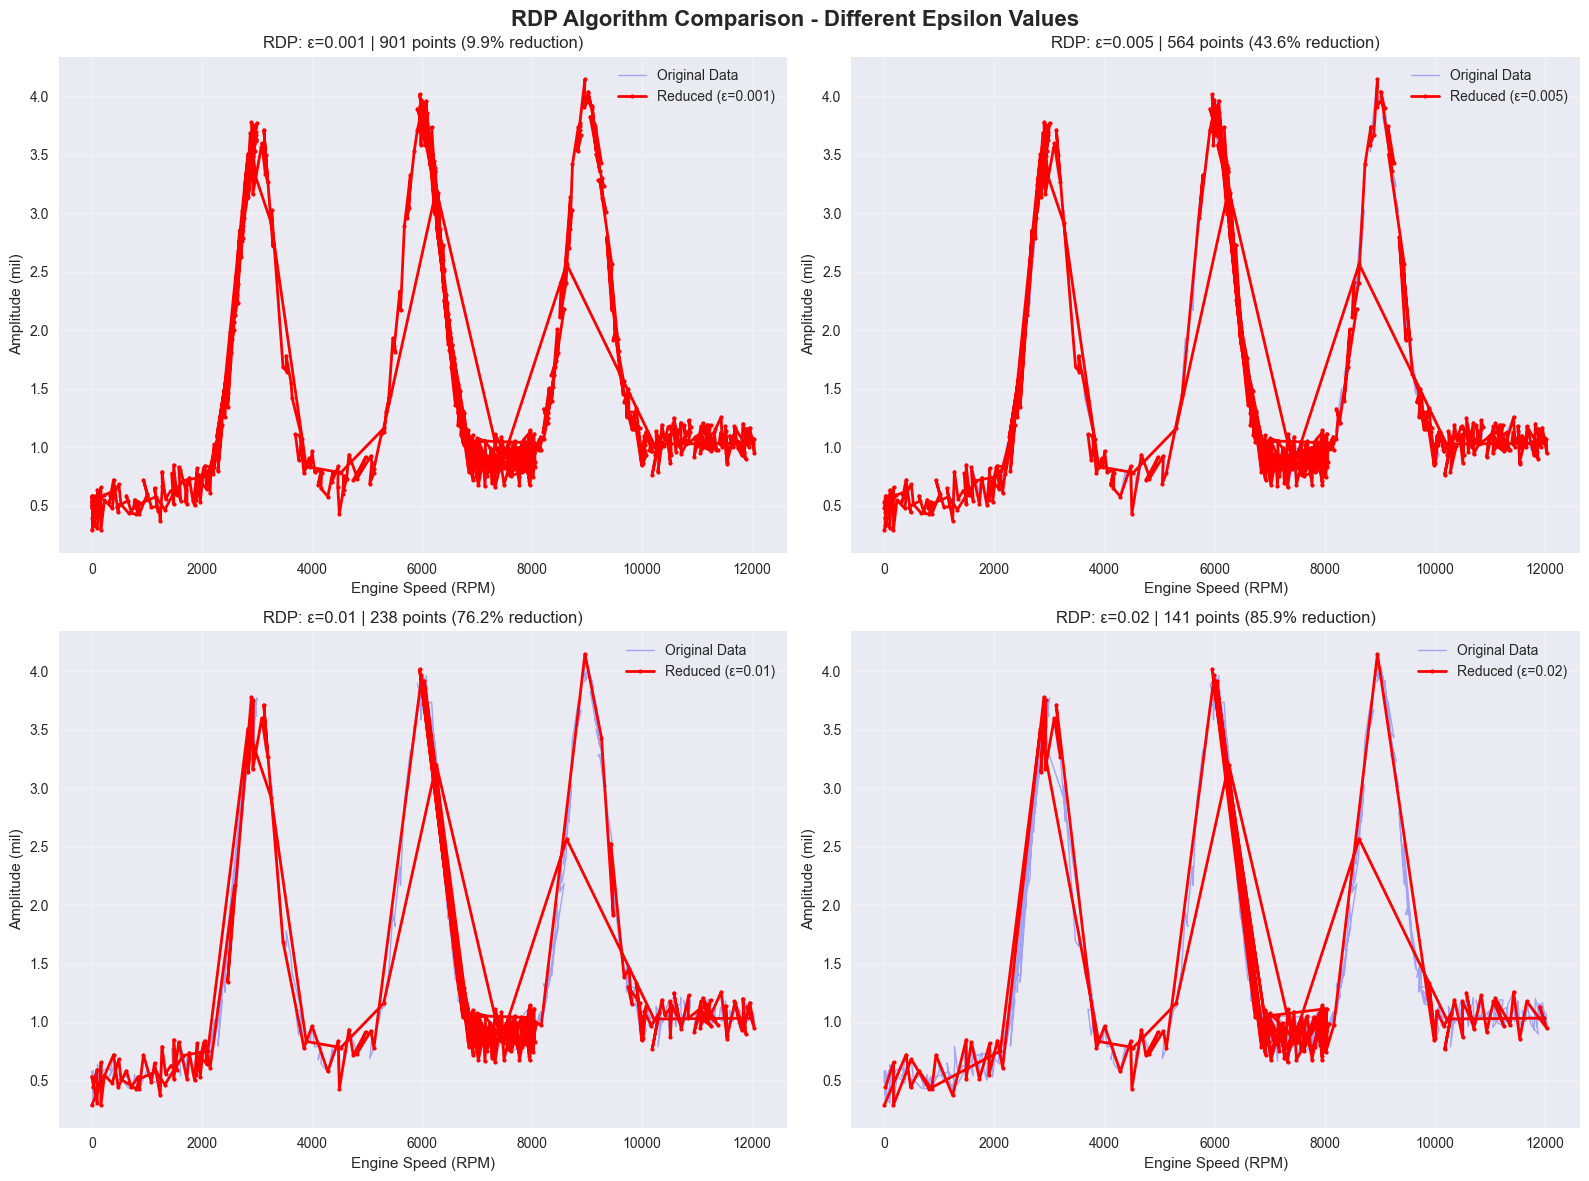

📊 Original data points: 1000
📉 RDP algorithm successfully reduces data while preserving key features!


In [15]:
# Demonstrate RDP algorithm with different epsilon values
print("🔍 Demonstrating RDP Algorithm Data Reduction...")

# Test different epsilon values
epsilon_values = [0.001, 0.005, 0.01, 0.02]
original_points = len(data)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, epsilon in enumerate(epsilon_values):
    # Apply RDP reduction
    reduced_data = analyzer.reduce_data('Engine_Speed_RPM', 'Bearing_1_Amplitude_mil', epsilon=epsilon)
    
    # Plot comparison
    ax = axes[i]
    original_speed = data['Engine_Speed_RPM'].values
    original_amplitude = data['Bearing_1_Amplitude_mil'].values
    
    ax.plot(original_speed, original_amplitude, 'b-', alpha=0.3, linewidth=1, label='Original Data')
    ax.plot(reduced_data[:, 0], reduced_data[:, 1], 'ro-', markersize=3, 
            linewidth=2, label=f'Reduced (ε={epsilon})')
    
    reduction_pct = (1 - len(reduced_data)/original_points) * 100
    
    ax.set_xlabel('Engine Speed (RPM)')
    ax.set_ylabel('Amplitude (mil)')
    ax.set_title(f'RDP: ε={epsilon} | {len(reduced_data)} points ({reduction_pct:.1f}% reduction)')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.suptitle('RDP Algorithm Comparison - Different Epsilon Values', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"📊 Original data points: {original_points}")
print("📉 RDP algorithm successfully reduces data while preserving key features!")


In [16]:
# Demonstrate Excel file reading and analysis
print("📁 Reading gas turbine data from Excel file...")

# Create a new analyzer instance for Excel data
excel_analyzer = RotorDynamicsAnalyzer()

# Read the Excel file we generated
excel_data = excel_analyzer.read_excel_data('synthetic_gas_turbine_data.xlsx')

if excel_data is not None:
    print("✅ Excel file loaded successfully!")
    
    # Display file information
    print(f"📊 Loaded data shape: {excel_data.shape}")
    print(f"📈 Speed range: {excel_data['Engine_Speed_RPM'].min():.0f} - {excel_data['Engine_Speed_RPM'].max():.0f} RPM")
    
    # Critical speed detection
    from scipy.signal import find_peaks
    
    amplitude = excel_data['Bearing_1_Amplitude_mil'].values
    speed = excel_data['Engine_Speed_RPM'].values
    
    # Find critical speeds (peaks in amplitude)
    peaks, properties = find_peaks(amplitude, height=np.mean(amplitude) + np.std(amplitude))
    
    print(f"\n🎯 Critical Speed Analysis:")
    print(f"📍 Found {len(peaks)} potential critical speeds:")
    
    for i, peak_idx in enumerate(peaks[:5]):  # Show top 5
        print(f"   {i+1}. {speed[peak_idx]:.0f} RPM - Amplitude: {amplitude[peak_idx]:.3f} mil")
    
    # Show Excel data sample
    print("\n📋 Excel Data Sample:")
    display(excel_data[['Engine_Speed_RPM', 'Bearing_1_Amplitude_mil', 'Bearing_2_Amplitude_mil', 
                       'Turbine_Temp_C', 'Fuel_Flow_kg_h']].head())
    
else:
    print("❌ Failed to load Excel file")

print("\n💡 To analyze your own data:")
print("   1. Replace 'synthetic_gas_turbine_data.xlsx' with your file path")
print("   2. Adjust column names to match your data structure")
print("   3. Run the polar plot analysis with your specific parameters")


📁 Reading gas turbine data from Excel file...
Reading data from synthetic_gas_turbine_data.xlsx...
Data loaded successfully! Shape: (1000, 30)
Columns: ['Time_s', 'Engine_Speed_RPM', 'Bearing_1_Amplitude_mil', 'Bearing_1_Phase_deg', 'Bearing_2_Amplitude_mil', 'Bearing_2_Phase_deg', 'Turbine_Temp_C', 'Compressor_Temp_C', 'Compressor_Pressure_bar', 'Fuel_Flow_kg_h', 'Air_Flow_kg_s', 'Parameter_12', 'Parameter_13', 'Parameter_14', 'Parameter_15', 'Parameter_16', 'Parameter_17', 'Parameter_18', 'Parameter_19', 'Parameter_20', 'Parameter_21', 'Parameter_22', 'Parameter_23', 'Parameter_24', 'Parameter_25', 'Parameter_26', 'Parameter_27', 'Parameter_28', 'Parameter_29', 'Parameter_30']
✅ Excel file loaded successfully!
📊 Loaded data shape: (1000, 30)
📈 Speed range: 0 - 12039 RPM

🎯 Critical Speed Analysis:
📍 Found 95 potential critical speeds:
   1. 2735 RPM - Amplitude: 2.955 mil
   2. 2744 RPM - Amplitude: 2.894 mil
   3. 2818 RPM - Amplitude: 3.133 mil
   4. 2809 RPM - Amplitude: 3.344 mil

,Engine_Speed_RPM,Bearing_1_Amplitude_mil,Bearing_2_Amplitude_mil,Turbine_Temp_C,Fuel_Flow_kg_h
0,0.000000,0.288764,0.764389,291.956278,-54.271409
1,141.145704,0.519824,0.672891,1417.241919,2805.781060
2,170.478829,0.481099,0.847948,1700.209298,3431.082635
3,98.744713,0.483599,0.778273,1105.954802,1980.113937
4,213.568538,0.588878,0.594271,2013.428699,4313.656098



💡 To analyze your own data:
   1. Replace 'synthetic_gas_turbine_data.xlsx' with your file path
   2. Adjust column names to match your data structure
   3. Run the polar plot analysis with your specific parameters
